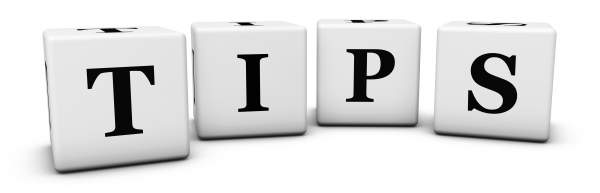

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1)-Is there any relationship between total_bill and tip?

In [32]:
df.loc[0:245,('total_bill','tip')].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


Text(0.5, 1.0, 'The Relation b/w total_bill and tip')

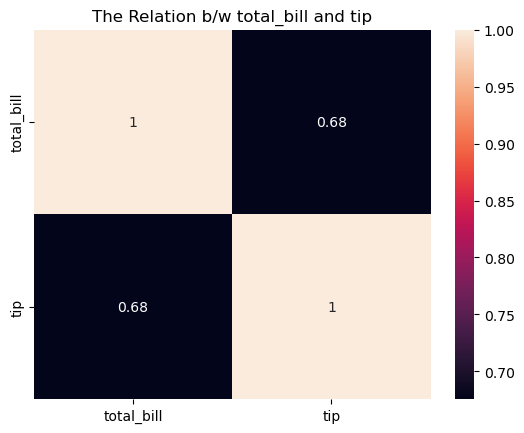

In [33]:
df1=df.loc[0:245,('total_bill','tip')]
sns.heatmap(data=df1.corr(),annot=True)
plt.title('The Relation b/w total_bill and tip' )

### 2)-Majority of which gender paying more tip?

In [115]:
df.loc[0:245,('tip','sex')].groupby(by='sex').sum()

,tip
sex,
Male,485.07
Female,246.51


<AxesSubplot:xlabel='sex', ylabel='tip'>

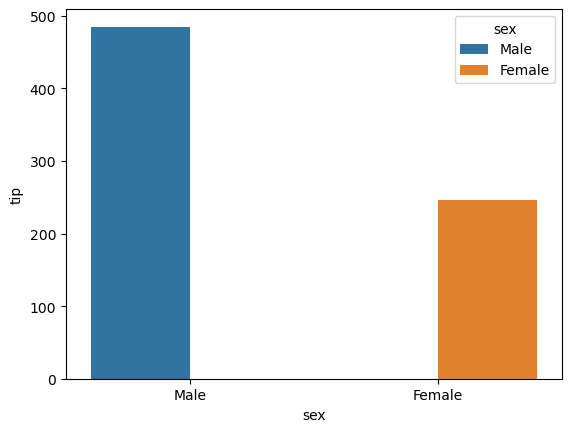

In [114]:
sns.barplot(data=df.loc[0:245,('sex','tip')].groupby(by='sex').sum().reset_index(),x='sex',y='tip', hue='sex')

### 3)-Maximum smokers in which gender ,compare that smoking gender with the non-smoking for who paid high tip?

### Smokers and Non-smoker

In [75]:
df['smoker_type'] = df['smoker'].apply(lambda x: 'smoker' if x=='Yes' else 'Non-smoker')
df.groupby(['sex','smoker_type'])['tip'].sum()

sex     smoker_type
Male    smoker         183.07
        Non-smoker     302.00
Female  smoker          96.74
        Non-smoker     149.77
Name: tip, dtype: float64

### 4)-Relationship of the food quantity(size) and tips?

In [34]:
df.loc[0:245,('tip','size')].corr()

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


<AxesSubplot:>

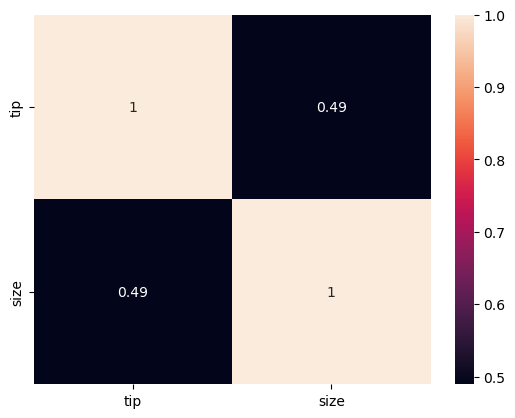

In [38]:
sns.heatmap(data=df.loc[0:245,('tip','size')].corr(),annot=True)

### 5)- Which gender is visiting most in weekend and working days

In [73]:
df['day_type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Working day')
df.groupby(['day_type', 'sex'])['sex'].count()

day_type     sex   
Weekend      Male      117
             Female     46
Working day  Male       40
             Female     41
Name: sex, dtype: int64

### 6)-Getting high tip on weekend or working days?

In [77]:
df['day_type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Working day')
df.groupby(by='day_type')['tip'].sum()

day_type
Weekend        507.79
Working day    223.79
Name: tip, dtype: float64

### 7)-which gender paid high tip on weekdays and working days?

In [79]:
df['day_type']=df['day'].apply(lambda x: 'weekend' if x in ['Sun','Sat'] else 'Workingday')
df.groupby(['day_type','sex'])['tip'].sum()

day_type    sex   
Workingday  Male      116.34
            Female    107.45
weekend     Male      368.73
            Female    139.06
Name: tip, dtype: float64

### 8)- The people who visit for Dinner and had more than average size, maximum of  what gender?

In [128]:
df4=df.loc[0:245,('sex','size','time')].where(df['time'] == 'Dinner')
df4.where(df['size']>df['size'].mean()).groupby(['time','sex'])['sex'].count()

time    sex   
Lunch   Male       0
        Female     0
Dinner  Male      52
        Female    18
Name: sex, dtype: int64

### 9)- From above question we found the gender ,from that the total tip paid by both gender ?

In [148]:
df4=df.loc[0:245,('sex','size','time','tip')].where(df['time']=='Dinner')
df4.where(df['size']>df['size'].mean()).groupby(['time','sex'])['tip'].sum()

time    sex   
Lunch   Male        0.00
        Female      0.00
Dinner  Male      201.08
        Female     66.15
Name: tip, dtype: float64

### 10)- In which particular day the peolple order for more size ,group by days?

In [150]:
df['day_type']=df['day'].apply(lambda x: 'Weekend' if x in ['Sun','Sat'] else 'Workingday')
df.groupby(['day_type'])['size'].sum()

day_type
Weekend       435
Workingday    192
Name: size, dtype: int64

### 11)- Maximum of which gender paid less than the average tip?

In [160]:
df.loc[0:245,('sex','tip')].where(df['tip']<df['tip'].mean()).groupby(by='sex').count()

,tip
sex,
Male,75
Female,48


<AxesSubplot:xlabel='sex', ylabel='tip'>

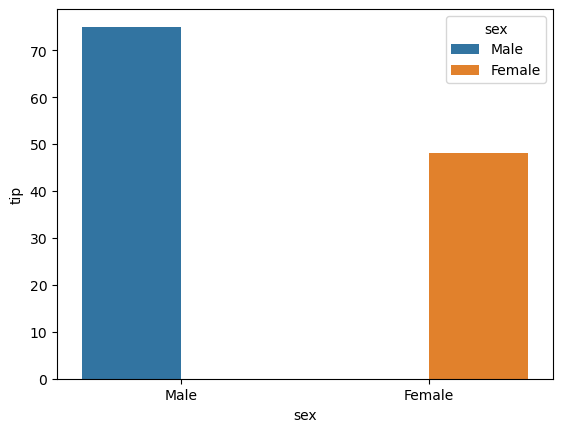

In [159]:
df5=df.loc[0:245,('sex','tip')].where(df['tip']<df['tip'].mean()).groupby(by='sex').count()
sns.barplot(data=df5.reset_index(),x='sex',y='tip',hue='sex')

### 12)- More somkers visit on which time?

In [179]:
df.loc[0:245, ('smoker', 'time')].groupby(['smoker','time'])['smoker'].count()


smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
Name: smoker, dtype: int64

### 13)-Which gender is buying more food in what time?

In [181]:
df.loc[0:245,('time','sex','size')].groupby(['time','sex'])['size'].sum()

time    sex   
Lunch   Male       78
        Female     86
Dinner  Male      335
        Female    128
Name: size, dtype: int64

### 14)-What is the most prefered size of the customers

In [187]:
df.loc[0:245,('size')].mode()

0    2
Name: size, dtype: int64

### 15)-  Highest total bill paid in what time?

In [191]:
df.loc[0:,('time','total_bill')].groupby(by='time')['total_bill'].max()

time
Lunch     43.11
Dinner    50.81
Name: total_bill, dtype: float64